数据展示部分

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import calmap
df = pd.read_csv('D:/day.csv')#读取共享自行车数据
df['dteday'] = pd.to_datetime(df['dteday'])#将日期改为时间格式
df.head()#数据展示

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


将cnt,casual,registered汇总分析

In [2]:
#将cnt,casual,registered汇总分析，并且绘制时序图
mydata=df[['dteday','cnt','casual','registered']]
mydata['month']=[d.month for d in mydata['dteday']]
mydata['year']=[d.year for d in mydata['dteday']]
grouped = mydata['cnt'].groupby([mydata['year'],mydata['month']])
x=list(grouped.sum())
grouped1 = mydata['casual'].groupby([mydata['year'],mydata['month']])
x1=list(grouped1.sum())
grouped2 = mydata['registered'].groupby([mydata['year'],mydata['month']])
x2=list(grouped2.sum())
date = pd.date_range(start = '2011-1-1',end = '2012-12-31',freq = 'M')
y = list(date)
dic = {'date':y,'cnt':x,'casual':x1,'registered':x2}
mydata0=pd.DataFrame(dic)
mydata0.head()

<ipython-input-2-7a3ba0b82247>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['month']=[d.month for d in mydata['dteday']]
<ipython-input-2-7a3ba0b82247>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata['year']=[d.year for d in mydata['dteday']]


,date,cnt,casual,registered
0,2011-01-31,38189,3073,35116
1,2011-02-28,48215,6242,41973
2,2011-03-31,64045,12826,51219
3,2011-04-30,94870,22346,72524
4,2011-05-31,135821,31050,104771


绘制cnt,casual,registered的时序图

D:\anaconda\lib\site-packages\plotnine\guides\guides.py:197: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


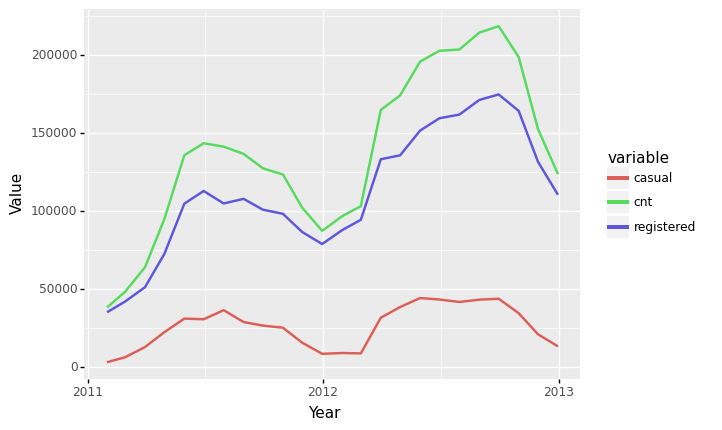

<ggplot: (139137998074)>

In [4]:
#绘制cnt,casual,registered的时序图
from plotnine import *
import matplotlib.pyplot as plt 
import calmap
melt_df = pd.melt(mydata0,id_vars=["date"],var_name='variable',value_name='value')
(
    ggplot(melt_df, aes(x ='date', y = 'value', group='variable',color='variable') )+
    geom_line(size=1)+
    scale_x_date(date_labels = "%Y",date_breaks = "1 year")+
    scale_fill_hue(s = 0.90, l = 0.65, h=0.0417,color_space='husl')+
    xlab("Year")+ 
    ylab("Value")
)

绘制关于cnt的日历图

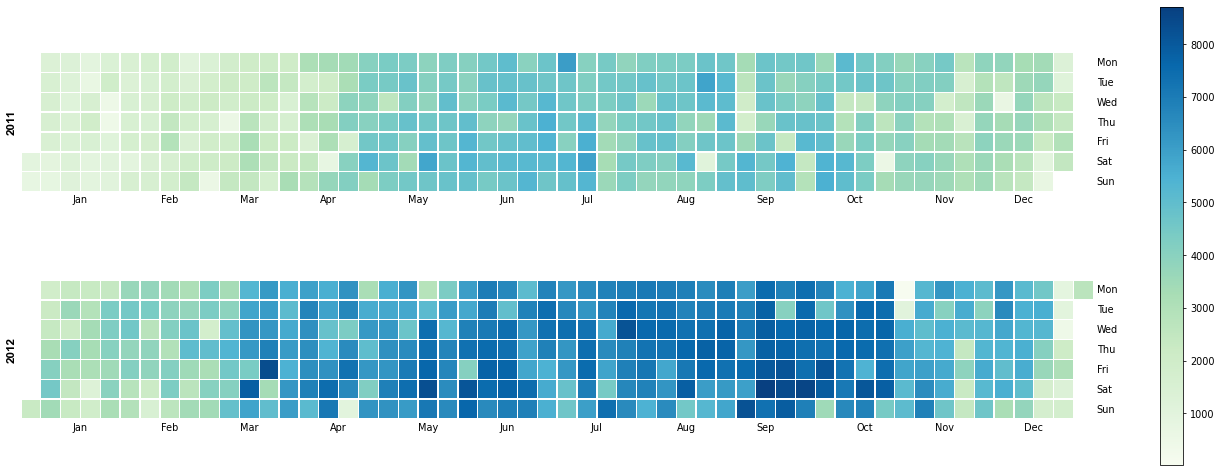

In [5]:
#绘制关于cnt的日历图
from plotnine import *
import matplotlib.pyplot as plt 
import calmap
dic2 = {'date':df.dteday,'value':df.cnt}
data = pd.DataFrame(dic2)
data.set_index('date', inplace=True)
fig,ax = calmap.calendarplot(data['value'],  fillcolor='grey', 
                           linecolor='w',linewidth=0.4,cmap='GnBu',
                           yearlabel_kws={'color':'black', 'fontsize':12},
                           fig_kws=dict(figsize=(20,7),dpi= 70))
#添加colorbar
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

绘制关于casual的日历图

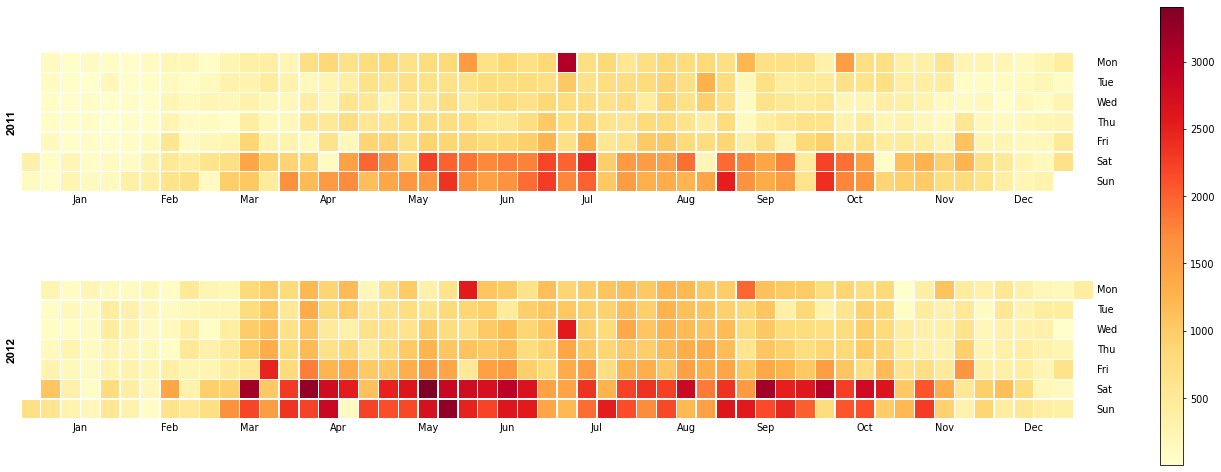

In [6]:
#绘制关于casual的日历图
dic = {'date':df.dteday,'value':df.casual}
data = pd.DataFrame(dic)
data.set_index('date', inplace=True)
fig,ax = calmap.calendarplot(data['value'],  fillcolor='grey', 
                           linecolor='w',linewidth=0.4,cmap='YlOrRd',
                           yearlabel_kws={'color':'black', 'fontsize':12},
                           fig_kws=dict(figsize=(20,7),dpi= 70))
#添加colorbar
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

绘制关于registered的日历图

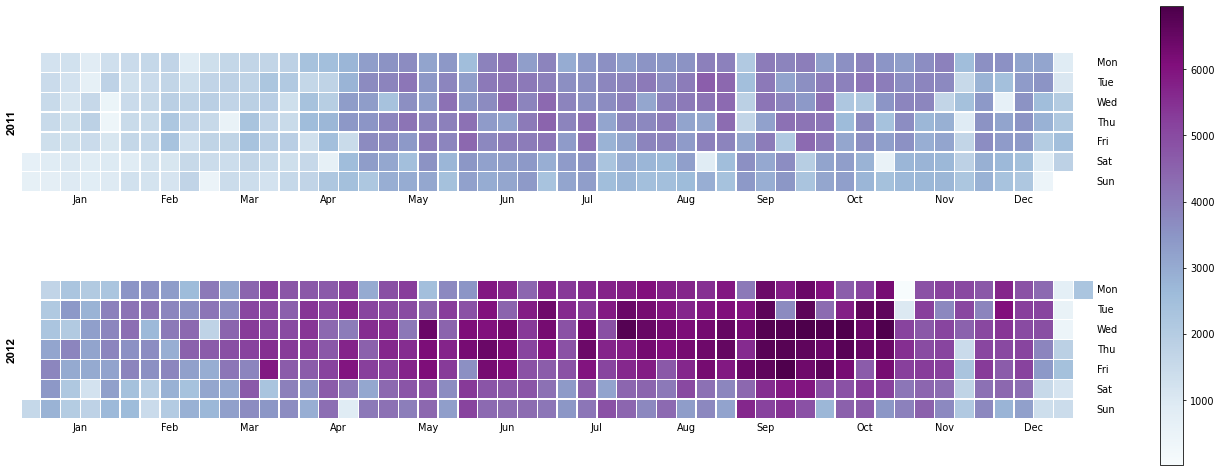

In [7]:
#绘制关于registered的日历图
dic1 = {'date':df.dteday,'value':df.registered}
data = pd.DataFrame(dic1)
data.set_index('date', inplace=True)
fig,ax = calmap.calendarplot(data['value'],  fillcolor='grey', 
                           linecolor='w',linewidth=0.4,cmap='BuPu',
                           yearlabel_kws={'color':'black', 'fontsize':12},
                           fig_kws=dict(figsize=(20,7),dpi= 70))
#添加colorbar
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

编写类analysis用于数据的分析和处理

In [8]:
#编写类analysis用于数据的分析和处理
from scipy.stats import chi
from scipy.stats import norm
class analysis:
    def findnan(self,x):#判断有无缺失值
        if all(x.notnull().all())==True:
            print('无缺失值')
        else:
            print('有缺失值')
    def mean(self,x):#返回均值
        self.mean = sum(x)/len(x)
        return self.mean
    def sd(self,x):#返回标准差
        sd2 = sum((self.mean(x)-x)**2)/len(x)
        return sd2**0.5
    def chisq_test(self,x):#卡方拟合优度检验
        from scipy.stats import chi
        df = len(x)-1
        expectnum = sum(x)/len(x)
        ch = sum((x-expectnum)**2)/expectnum
        pvalue = 1-chi.cdf(ch,df)
        print('自由度为',df)
        print('p值为',pvalue,'**当p值很小时显示为0.0')
    def z_test(self,x,y):#大样本时均值是否相等检验
        from scipy.stats import norm
        n1 = len(x)
        n2 = len(y)
        x1 = sum(x)/n1
        y1 = sum(y)/n2
        m0 = x1-y1
        s2 = sum((x1-x)**2)/n1**2+sum((y1-y)**2)/n2**2
        pvalue =(1-norm.cdf(abs(m0/s2**0.5)))*2
        print('p值为',pvalue,'**当p值很小时显示为0.0')
    def diff(self,x):#差分运算
        try:#捕获异常
            p = x.shape[1]
            n = x.shape[0]
            x1 = np.mat(x.iloc[:n-1])
            x2 = np.mat(x.iloc[1:])
            z = x2-x1
            return pd.DataFrame(z)
        except:
            n = x.shape[0]
            x1 = np.array(x.iloc[:n-1])
            x2 = np.array(x.iloc[1:])
            z = x2-x1
            return z

编写Lr类来进行回归分析

In [53]:
import numpy as np
import pandas as pd
import scipy.stats as st

class  Lr(object):
    #intercept定义是否有截距项，在计量经济分析中，基本都要有截距项，否则计算出的拟合优度是没有意义的
    def __init__(self, y, X, intercept=True):
        data_x = X.copy()
        data_y = y.copy()
        self.data_x = data_x
        self.y = np.array(data_y)
        self.intercept = intercept
        
        if intercept == False:
            self.columns = data_x.columns
            self.X = np.mat(data_x)
        else:
            #插入截距项
            data_x.insert(0,'intercept',np.ones(len(data_x)))   
            #每个变量名称
            self.columns = data_x.columns
            #转换为矩阵，方便后面运算
            self.X = np.mat(data_x)
        
        #X的转置，方便后面运算
        self.XT=np.mat(self.X).T 
        self.N = self.X.shape[0]   #样本量
        self.K = self.X.shape[1]  #变量个数
    
    #拟合模型
    def fit(self, output=True):
        #使用最小二乘法(X'X)的逆成X'y
        self.b = np.array(np.dot(np.dot(np.linalg.inv(np.dot(self.XT,self.X)),self.XT),np.mat(self.y).T))
        if output:
            for i in range(self.K):
                print("variable {0}'s cofe estimate is : {1}".format(self.columns[i], self.b[i][0]))
        
        self.S = np.array(np.linalg.inv(np.dot(self.XT,self.X)))
        return self.b
    
    #预测函数
    def predict(self, X_p):
        #直接使用条件期望作y=Xb为预测值
        y_hat =np.array(np.dot(X_p,self.b))
        return y_hat
    
    #参数T检验
    def T_test(self, alpha):
        #计算预测值
        y_hat = np.array(np.dot(self.X,self.b).T)[0]
        #计算e'e,即残差平方和
        error_square = np.sum(np.square(y_hat-self.y))
        #计算扰动项的方差估计,即残差平方和
        sigma_hat = error_square/(self.N-self.K)
        #计算(X'X)的逆，用于估计参数b的方差
        #S = self.S
        for i in range(self.K):
            sk = self.S[i][i]
            #b的方差估计为sigma_hat * sk，构造t统计量，服从自由度为n-k的T分布
            Tk = self.b[i][0]/np.sqrt(sigma_hat * sk)
            #查表进行检验
            if abs(Tk) > abs(st.t.ppf(alpha/2, df = self.N-self.K)):
                print("T of variable {0} is: {1}, refuse H0".format(self.columns[i], Tk))
            else:
                print("T of variable {0} is: {1}, can't refuse H0".format(self.columns[i], Tk))
                
    #拟合优度计算
    def R_square(self):
        y_ba = np.mean(self.y)
        y_hat = np.array(np.dot(self.X,self.b).T)[0]
        #计算总平方和
        self.SST = np.sum(np.square(self.y-y_ba))
        #计算误差平方和
        self.SSE = np.sum(np.square(self.y-y_hat))
        #计算离差平方和
        self.SSR = self.SST - self.SSE
        #利用拟合优度公式计算拟合优度
        self.R_2 = self.SSR/self.SST
        
        return self.R_2
    
    #整体F检验
    def F_test(self, alpha):
        #先求出拟合优度
        self.R_square()
        #利用公式求F统计量，附送自由优度为(K-1, N-K)的F分布
        F = (self.R_2/(self.K-1))/((1-self.R_2)/(self.N-self.K))
        #查表进行检验
        if abs(F) > abs(st.f.ppf(1-alpha, dfn = self.K-1, dfd = self.N-self.K)):
            print("F of function is: {0}, refuse H0".format(F))
        else:
            print("F of function is: {0}, can't refuse H0".format(F))
    
    def data_relation(self):
        if self.intercept:
            return self.data_x.loc[:,self.data_x.columns!='intercept'].corr()
        else:
            return self.data_x.corr()
        
        
    
    def VIF_cul(self, ind):
        #使用最小二乘法(X'X)的逆成X'y
        yk = np.array(self.X[:, ind].T)
        #有截距项时：
        if self.intercept:
            Xk = self.X[:, [i for i in range(1,ind)]+[j for j in range(ind+1, self.K)]]
        #无截距项时：
        else:
            Xk = self.X[:, [i for i in range(ind)]+[j for j in range(ind+1, self.K)]]
        
        vif_model = mul_linear_model(yk, pd.DataFrame(Xk), intercept=False)
        vif_model.fit(output=False)
        Rk_2 = vif_model.R_square()
        VIF_k = 1/(1-Rk_2)
        return VIF_k
        
    
    def VIF_test(self):
        for i in range(1, self.K):
            VIF_k = self.VIF_cul(i)
            print("variable {0}'s VIF estimate is : {1}".format(self.columns[i], VIF_k))
    
    def condition_num(self):
        if self.intercept:
            M = np.dot(self.XT[[i for i in range(1, self.K)],:], self.X[:, [j for j in range(1, self.K)]])
        else:
            M = np.dot(self.XT, self.X)
        eigenvalue, eigenvector = np.linalg.eig(M)
        cond_num = np.sqrt(eigenvalue[0]/eigenvalue[-1])
        print("data X's condition number is: {0}".format(cond_num))
    
    #异方差怀特检验
    def White_test(self, alpha):
        #算出y_hat
        y_hat = np.array(np.dot(self.X,self.b).T)[0]
        #计算偏差
        e = y_hat-self.y
        import matplotlib.pyplot as plt
        plt.plot(e)
        plt.title('ei')
        #计算white检验的自变量white_x,包括每一个x,和x的平方，以及两两之间的交叉项
        white_x = self.data_x.copy()
        x_columns = white_x.columns
        #计算平方项与交叉项，第一列是截距项，无需计算
        for i in range(1, len(x_columns)):
            for j in range(1, i+1):
                white_x[x_columns[i]+'*'+x_columns[j]] = white_x[x_columns[i]]*white_x[x_columns[j]]
        
        #调用自身类，进行回归求R2,white_x已经包含截距项，无需再添加截距项
        white_model = Lr(e, white_x, intercept=False)
        #求回归参数
        white_model.fit(output=False)
        #求拟合优度
        white_R_2 = white_model.R_square()
        #计算统计量自由度
        white_df = white_model.K-1
        #计算white统计量
        white = white_model.N*white_R_2
        #进行假设检验
        if white > st.chi2.ppf(1-alpha, df = white_df):
            print("white statistic is: {0}, refuse H0".format(white))
        else:
            print("white statistic is: {0}, can't refuse H0".format(white))
    
    #自相关DW检验
    def DW_test(self):
        #算出y_hat
        y_hat = np.array(np.dot(self.X,self.b).T)[0]
        #计算偏差
        e = y_hat-self.y
        #得到当期残差e(t)
        e_t = e[1:len(e)]
        #得到前一期的残差e(t-1)
        e_tlag = e[0:len(e)-1]
        #进行回归求rou
        DW_model = Lr(e_t, pd.DataFrame(e_tlag), intercept=False)
        DW_model.fit(output=False)
        rou = DW_model.b[0][0]
        #利用dw统计量和rou的关系求出DW统计量
        d = 2*(1-rou)
        return d

描述统计部分

分类型变量：

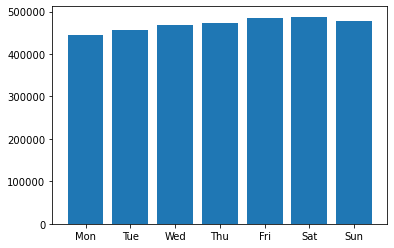

自由度为 6
p值为 0.0 **当p值很小时显示为0.0


In [33]:
weekday = [0]*7#检查weekday与CNT的关系(1)
for i in range(7):
    weekday[i]=sum(df.loc[df.weekday==i]['cnt'])
import matplotlib.pyplot as plt
langs1 = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat','Sun'] 
plt.bar(langs1,height=weekday) 
plt.show()
weekday = np.array(weekday)
A = analysis()
A.chisq_test(weekday)

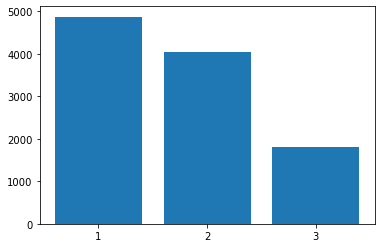

自由度为 2
p值为 0.0 **当p值很小时显示为0.0


In [34]:
weather = [0]*3#检查weather与CNT的关系(2)
for i in range(3):
  weather[i]=sum(df.loc[df.weathersit==i+1]['cnt'])/len(df.loc[df.weathersit==i+1]['cnt'])
langs2 = ['1', '2', '3'] 
plt.bar(langs2,height=weather) 
plt.show()
weather = np.array(weather)
A.chisq_test(weather)

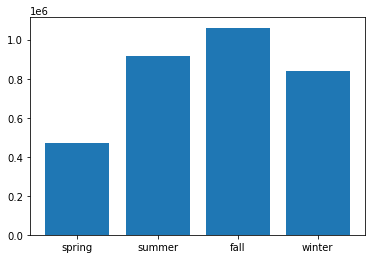

自由度为 3
p值为 0.0 **当p值很小时显示为0.0


In [35]:
season = [0]*4#检查season与CNT的关系(3)
for i in range(4):
  season[i]=sum(df.loc[df.season==i+1]['cnt'])
langs3 = ['spring', 'summer', 'fall','winter'] 
plt.bar(langs3,height=season) 
plt.show()
season = np.array(season)
A.chisq_test(season)

对分类型变量进行卡方拟合优度检验

In [36]:
print('卡方检验weekday:')
print(A.chisq_test(weekday))
print('\n')
print('卡方检验weather:')
print(A.chisq_test(weather))
print('\n')
print('卡方检验season:')
print(A.chisq_test(season))

卡方检验weekday:
自由度为 6
p值为 0.0 **当p值很小时显示为0.0
None


卡方检验weather:
自由度为 2
p值为 0.0 **当p值很小时显示为0.0
None


卡方检验season:
自由度为 3
p值为 0.0 **当p值很小时显示为0.0
None


对分类型变量进行均值是否相等的z检验

In [37]:
print('cnt是否工作日的均值是否有明显差别的z检验')
x1 = df.loc[df.workingday==0]['cnt']
y1 = df.loc[df.workingday==1]['cnt']
print(A.z_test(x1,y1))
print('\n')
print('casual是否工作日的均值是否有明显差别的z检验')
x2 = df.loc[df.workingday==0]['casual']
y2 = df.loc[df.workingday==1]['casual']
print(A.z_test(x2,y2))
print('\n')
print('registered是否工作日的均值是否有明显差别的z检验')
x3 = df.loc[df.workingday==0]['registered']
y3 = df.loc[df.workingday==1]['registered']
print(A.z_test(x3,y3))

cnt是否工作日的均值是否有明显差别的z检验
p值为 0.10864221446370914 **当p值很小时显示为0.0
None


casual是否工作日的均值是否有明显差别的z检验
p值为 0.0 **当p值很小时显示为0.0
None


registered是否工作日的均值是否有明显差别的z检验
p值为 0.0 **当p值很小时显示为0.0
None


连续型变量

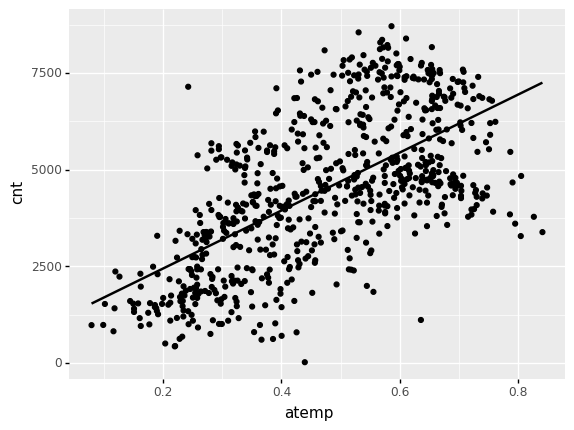

<ggplot: (139140731603)>

In [38]:
ggplot(df,aes(x='atemp',y='cnt'))+geom_point()+geom_smooth(method='lm', se=False) #画出atemp与cnt对应的散点图和回归直线

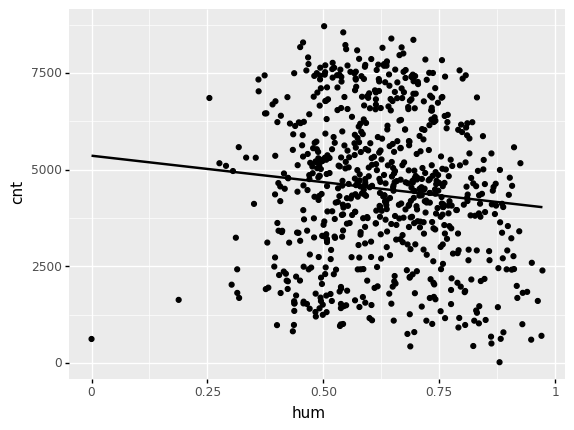

<ggplot: (139140731627)>

In [39]:
ggplot(df,aes(x='hum',y='cnt'))+geom_point()+geom_smooth(method='lm', se=False) #画出hum与hum对应的散点图和回归直线

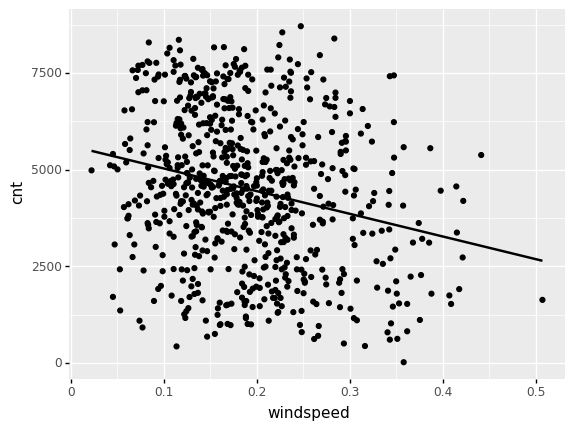

<ggplot: (139140772139)>

In [40]:
ggplot(df,aes(x='windspeed',y='cnt'))+geom_point()+geom_smooth(method='lm', se=False) #画出windspeed与cnt对应的散点图和回归直线

建模与分析部分

#模型1
#cnt~season+workingday+weathersit+temp+hum+windspeed

In [45]:
#模型1
X = df[['season','workingday','weathersit','temp','hum','windspeed']]
y = df.cnt
fit1 = Lr(y,X)
fit1.fit()
fit1.T_test(0.05)
fit1.F_test(0.05)

variable intercept's cofe estimate is : 3343.469336065856
variable season's cofe estimate is : 410.2484106183964
variable workingday's cofe estimate is : 166.89848859049778
variable weathersit's cofe estimate is : -474.9235116782251
variable temp's cofe estimate is : 5623.274285979508
variable hum's cofe estimate is : -2334.0505814514395
variable windspeed's cofe estimate is : -3333.365732925755
T of variable intercept is: 10.018001637229732, refuse H0
T of variable season is: 8.370132541613874, refuse H0
T of variable workingday is: 1.549189644785078, can't refuse H0
T of variable weathersit is: -3.9494816583164707, refuse H0
T of variable temp is: 18.896267050943102, refuse H0
T of variable hum is: -4.90735806238629, refuse H0
T of variable windspeed is: -4.801362666372559, refuse H0
F of function is: 130.55523188693016, refuse H0


white statistic is: 120.14741646671844, refuse H0


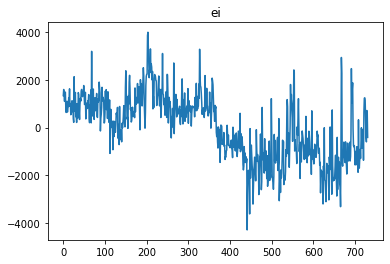

In [46]:
#模型1的残差分析
fit1.White_test(0.05)

模型2 log(cnt)~season+weekday+weathersit+atemp+hum+windspeed

In [49]:
X = df[['season','weekday','weathersit','atemp','hum','windspeed']]
y = np.log(df.cnt)
fit2 = Lr(y,X)
fit2.fit()
fit2.T_test(0.05)
fit2.F_test(0.05)

variable intercept's cofe estimate is : 7.894994714792844
variable season's cofe estimate is : 0.12267005587473848
variable weekday's cofe estimate is : 0.016042100836538918
variable weathersit's cofe estimate is : -0.18572438966712237
variable atemp's cofe estimate is : 1.821437399422466
variable hum's cofe estimate is : -0.6115303881949452
variable windspeed's cofe estimate is : -0.9809825488331831
T of variable intercept is: 75.94796309864653, refuse H0
T of variable season is: 8.239185471404653, refuse H0
T of variable weekday is: 2.1141180163996505, refuse H0
T of variable weathersit is: -5.079890000902989, refuse H0
T of variable atemp is: 17.851202223285995, refuse H0
T of variable hum is: -4.214825719500889, refuse H0
T of variable windspeed is: -4.6528151000272775, refuse H0
F of function is: 126.73911882884939, refuse H0


white statistic is: 249.9984203889819, refuse H0


0.795580576602738

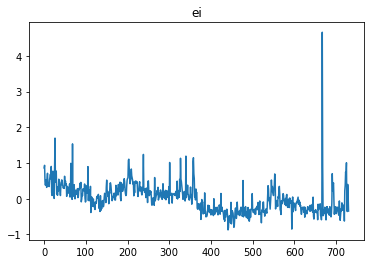

In [55]:
#模型2残差分析
fit2.White_test(0.05)
fit2.DW_test()

模型3 log(cnt)~weekday+weathersit+atemp+hum+windspeed

In [56]:
#模型3
X = df[['weekday','weathersit','atemp','hum','windspeed']]
y = np.log(df.cnt)
X1 = A.diff(X)#对自变量进行差分运算
y1 = A.diff(y)#对因变量进行差分运算

In [57]:
fit3 = Lr(y1,X1)
fit3.fit()
fit3.T_test(0.05)
fit3.F_test(0.05)

variable intercept's cofe estimate is : 0.0015329575135524937
variable 0's cofe estimate is : 0.011605150874251877
variable 1's cofe estimate is : -0.18968256700389557
variable 2's cofe estimate is : 1.3333140012226266
variable 3's cofe estimate is : -0.616050850129673
variable 4's cofe estimate is : -0.7497978133694132
T of variable intercept is: 0.11479907479729809, can't refuse H0
T of variable 0 is: 2.124784025986614, refuse H0
T of variable 1 is: -7.503398223011016, refuse H0
T of variable 2 is: 5.864878099373771, refuse H0
T of variable 3 is: -5.187730083384775, refuse H0
T of variable 4 is: -5.000800618645098, refuse H0
F of function is: 49.20448133885354, refuse H0


TypeError: unsupported operand type(s) for +: 'int' and 'str'

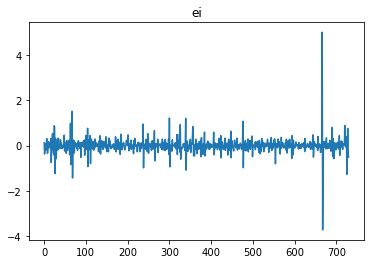

In [58]:
fit3.White_test(0.05)

In [59]:
fit3.DW_test()

2.6975777835681214